In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid', {'axes.facecolor': '.9'})
sns.set_palette(palette='deep')
sns_c = sns.color_palette(palette='deep')
%matplotlib inline

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:

df_total_masked =  pd.read_csv('filtered.csv',index_col=0,parse_dates=['date']).sort_index()
data = (((df_total_masked)).dropna())

In [3]:
data.head()

,_latitude,_longitude,date
_time_location,,,
20101117145556WED,0.546587,0.292711,2010-11-17
20101117171724WED,0.000000,0.292637,2010-11-17
20101117180215WED,0.476190,0.292724,2010-11-17
20101117190941WED,0.479296,0.292536,2010-11-17
20101117211820WED,0.477106,0.295028,2010-11-17


In [4]:
data.groupby('date')['date'].count()

date
2010-11-17     9
2010-11-18    35
2010-11-19    17
2010-11-20    51
2010-11-22    16
              ..
2011-08-10    13
2011-08-11    25
2011-08-12    28
2011-08-13    28
2011-08-14     2
Name: date, Length: 238, dtype: int64

In [5]:
data=data.groupby(['date'],as_index=False).agg({'_latitude':'mean','_longitude':'mean'})

In [6]:
data=data.drop(['date'],axis=1)

In [7]:
data

,_latitude,_longitude
0,0.439841,0.293690
1,0.492882,0.306010
2,0.509230,0.302110
3,0.392579,0.320544
4,0.535613,0.268649
...,...,...
233,0.504051,0.277518
234,0.510569,0.278292
235,0.480957,0.294122
236,0.419341,0.324952


K means For referral purposes

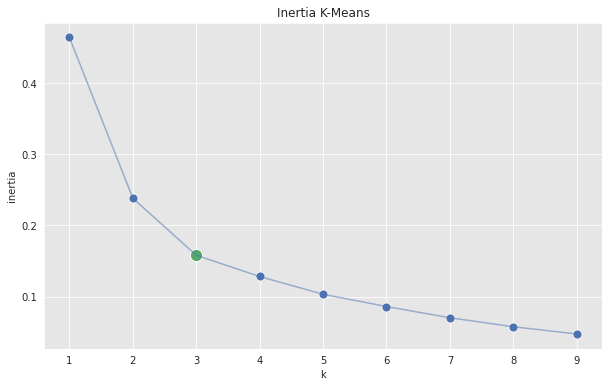

In [13]:
from sklearn.cluster import KMeans

inertias = []

k_candidates = range(1, 10)

for k in k_candidates:
    k_means = KMeans(random_state=42, n_clusters=k)
    k_means.fit(data)
    inertias.append(k_means.inertia_)

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=k_candidates, y = inertias, s=80, ax=ax)
sns.scatterplot(x=[k_candidates[2]], y = [inertias[2]], color=sns_c[2], s=150, ax=ax)
sns.lineplot(x=k_candidates, y = inertias, alpha=0.5, ax=ax)
ax.set(title='Inertia K-Means', ylabel='inertia', xlabel='k');

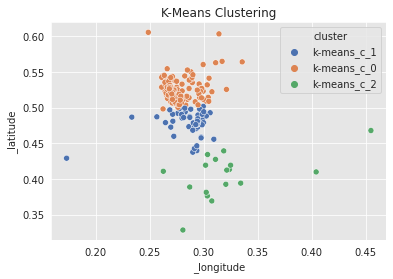

In [14]:
k_means = KMeans(random_state=42, n_clusters=3)
k_means.fit(data)
cluster = k_means.predict(data)

cluster = ['k-means_c_' + str(c) for c in cluster]

fig, ax = plt.subplots()
sns.scatterplot(x='_longitude', y='_latitude', data=data.assign(cluster = cluster), hue='cluster', ax=ax)
ax.set(title='K-Means Clustering');

### Graph laplacian matrix

helpful in eigenvector and value calculations

In [15]:
from scipy.sparse import csgraph

In [16]:
from sklearn.neighbors import kneighbors_graph
from scipy import sparse

def generate_graph_laplacian(df, nn):
    """Generate graph Laplacian from data."""
    # Adjacency Matrix.
    connectivity = kneighbors_graph(X=df, n_neighbors=nn, mode='connectivity')
    adjacency_matrix_s = (1/2)*(connectivity + connectivity.T)
    # Graph Laplacian.
    graph_laplacian_s = sparse.csgraph.laplacian(csgraph=adjacency_matrix_s, normed=False)
    graph_laplacian = graph_laplacian_s.toarray()
    print(adjacency_matrix_s)
    return graph_laplacian 
    
    
graph_laplacian = generate_graph_laplacian(df=data, nn=8)
print("Graph laplacian", graph_laplacian)
'''
# Plot the graph Laplacian as heat map.
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian')
'''

  (0, 159)	0.5
  (0, 73)	0.5
  (0, 56)	0.5
  (0, 8)	0.5
  (0, 90)	1.0
  (0, 169)	0.5
  (0, 203)	0.5
  (0, 130)	1.0
  (0, 172)	1.0
  (0, 139)	1.0
  (0, 165)	1.0
  (0, 43)	1.0
  (1, 227)	0.5
  (1, 138)	0.5
  (1, 176)	0.5
  (1, 185)	1.0
  (1, 156)	1.0
  (1, 208)	1.0
  (1, 209)	1.0
  (1, 33)	1.0
  (2, 178)	0.5
  (2, 230)	1.0
  (2, 156)	1.0
  (2, 131)	1.0
  (2, 215)	1.0
  :	:
  (236, 53)	0.5
  (236, 52)	0.5
  (236, 3)	1.0
  (236, 202)	1.0
  (236, 130)	0.5
  (236, 73)	1.0
  (236, 159)	1.0
  (236, 90)	1.0
  (236, 117)	1.0
  (236, 37)	1.0
  (237, 214)	0.5
  (237, 207)	0.5
  (237, 189)	0.5
  (237, 136)	0.5
  (237, 118)	0.5
  (237, 61)	0.5
  (237, 51)	0.5
  (237, 179)	0.5
  (237, 41)	0.5
  (237, 134)	1.0
  (237, 16)	0.5
  (237, 223)	1.0
  (237, 17)	1.0
  (237, 229)	1.0
  (237, 91)	1.0
Graph laplacian [[ 9.   0.   0.  ...  0.   0.   0. ]
 [ 0.   6.5  0.  ...  0.   0.   0. ]
 [ 0.   0.   7.5 ...  0.   0.   0. ]
 ...
 [ 0.   0.   0.  ...  6.   0.   0. ]
 [ 0.   0.   0.  ...  0.   8.5  0. ]
 [ 0.   

"\n# Plot the graph Laplacian as heat map.\nfig, ax = plt.subplots(figsize=(10, 8))\nsns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')\nax.set(title='Graph Laplacian')\n"

[Text(0.5, 1.0, 'Graph Laplacian')]

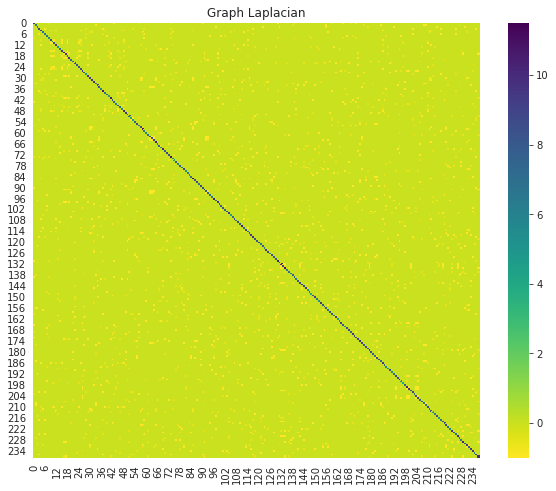

In [17]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(graph_laplacian, ax=ax, cmap='viridis_r')
ax.set(title='Graph Laplacian')


EIGENVALUE COMPUTATIONS

In [18]:
from scipy import linalg
eigenvals, eigenvcts = linalg.eig(graph_laplacian)

In [19]:
eigenvals

array([1.77635684e-15+0.j, 5.48492163e-02+0.j, 1.45993647e-01+0.j,
       1.99209451e-01+0.j, 2.50181764e-01+0.j, 3.92273227e-01+0.j,
       5.64396909e-01+0.j, 7.28051973e-01+0.j, 9.56326348e-01+0.j,
       9.91018077e-01+0.j, 1.02882845e+00+0.j, 1.08543442e+00+0.j,
       1.25619349e+00+0.j, 1.40706141e+00+0.j, 1.51818693e+00+0.j,
       1.83343947e+00+0.j, 2.04068507e+00+0.j, 2.36918662e+00+0.j,
       2.50920863e+00+0.j, 2.62948204e+00+0.j, 2.75620761e+00+0.j,
       2.83439758e+00+0.j, 3.10408704e+00+0.j, 3.19865349e+00+0.j,
       3.41498622e+00+0.j, 3.53563459e+00+0.j, 3.64320016e+00+0.j,
       3.82379442e+00+0.j, 3.95066351e+00+0.j, 4.15068220e+00+0.j,
       4.21513426e+00+0.j, 4.30240484e+00+0.j, 4.32419294e+00+0.j,
       4.37582874e+00+0.j, 4.49946387e+00+0.j, 4.63273343e+00+0.j,
       4.69257926e+00+0.j, 4.90270725e+00+0.j, 4.93715338e+00+0.j,
       5.03390646e+00+0.j, 5.07819043e+00+0.j, 5.13712790e+00+0.j,
       1.26181516e+01+0.j, 1.26925983e+01+0.j, 1.25031473e+01+

In [20]:
eigenvcts

array([[-6.48203724e-02,  1.06949512e-01, -9.81567117e-02, ...,
        -4.50703856e-15, -1.21927249e-14, -7.68202500e-17],
       [-6.48203724e-02,  4.00534662e-02,  3.73979667e-02, ...,
         3.00716631e-16, -3.22285159e-15, -1.92523569e-15],
       [-6.48203724e-02, -3.46444824e-03,  1.02187650e-02, ...,
         3.96450817e-14,  7.33762692e-14, -6.85125395e-15],
       ...,
       [-6.48203724e-02,  7.43342841e-02,  2.80117515e-02, ...,
         1.04901930e-14,  2.14908719e-14,  4.55201194e-16],
       [-6.48203724e-02,  1.09798984e-01, -1.20530142e-01, ...,
         4.25759859e-15,  7.84452163e-15, -1.55456562e-15],
       [-6.48203724e-02,  8.51466715e-02,  7.79586595e-03, ...,
        -6.22359096e-15, -1.44294153e-14,  1.52610754e-16]])

In [21]:
eigenvals.max()

(12.69259827915194+0j)

In [22]:
eigenvals.min()

(1.7763568394002505e-15+0j)

In [23]:
# We project onto the real numbers. 
def compute_spectrum_graph_laplacian(graph_laplacian):
    """Compute eigenvalues and eigenvectors and project 
    them onto the real numbers.
    """
    eigenvals, eigenvcts = linalg.eig(graph_laplacian)
    eigenvals = np.real(eigenvals)
    eigenvcts = np.real(eigenvcts)
    return eigenvals, eigenvcts

eigenvals, eigenvcts = compute_spectrum_graph_laplacian(graph_laplacian)

In [24]:
eigenvcts_norms = np.apply_along_axis(
  lambda v: np.linalg.norm(v, ord=2), 
  axis=0, 
  arr=eigenvcts
)

print('Min Norm: ' + str(eigenvcts_norms.min()))
print('Max Norm: ' + str(eigenvcts_norms.max()))

Min Norm: 0.9999999999999997
Max Norm: 1.0000000000000002


In [25]:
eigenvals_sorted_indices = np.argsort(eigenvals)
eigenvals_sorted = eigenvals[eigenvals_sorted_indices]

Plotting all the eigenvalues

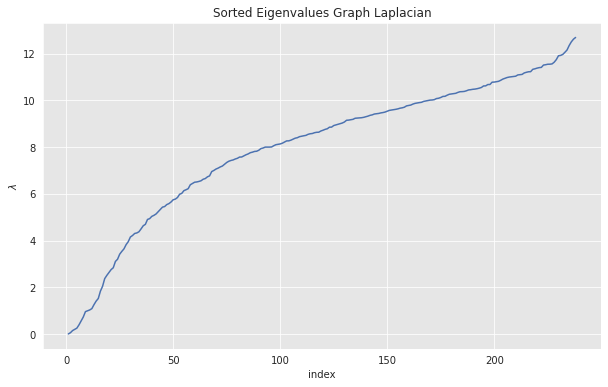

In [26]:
fig, ax = plt.subplots(figsize=(10, 6))
sns.lineplot(x=range(1, eigenvals_sorted_indices.size + 1), y=eigenvals_sorted, ax=ax)
ax.set(title='Sorted Eigenvalues Graph Laplacian', xlabel='index', ylabel=r'$\lambda$');

No handles with labels found to put in legend.


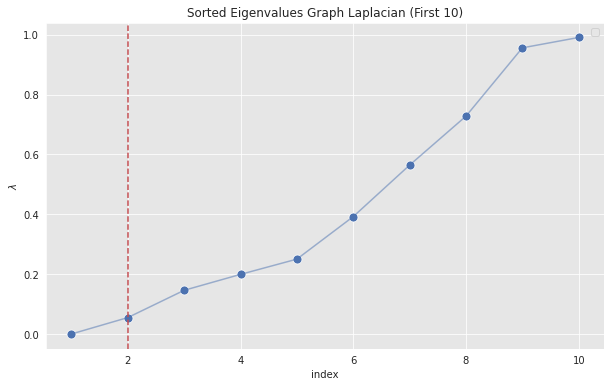

In [31]:
index_lim = 10

fig, ax = plt.subplots(figsize=(10, 6))
sns.scatterplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], s=80, ax=ax)
sns.lineplot(x=range(1, eigenvals_sorted_indices[: index_lim].size + 1), y=eigenvals_sorted[: index_lim], alpha=0.5, ax=ax)
ax.axvline(x=2, color=sns_c[3],  linestyle='--')
ax.legend()
ax.set(title=f'Sorted Eigenvalues Graph Laplacian (First {index_lim})', xlabel='index', ylabel=r'$\lambda$');

In [32]:
zero_eigenvals_index = np.argwhere(abs(eigenvals) < 1e-5)
eigenvals[zero_eigenvals_index]

array([[1.77635684e-15]])

In [33]:
proj_df = pd.DataFrame(eigenvcts[:, zero_eigenvals_index.squeeze()])
proj_df.columns = ['v_' + str(c) for c in proj_df.columns]


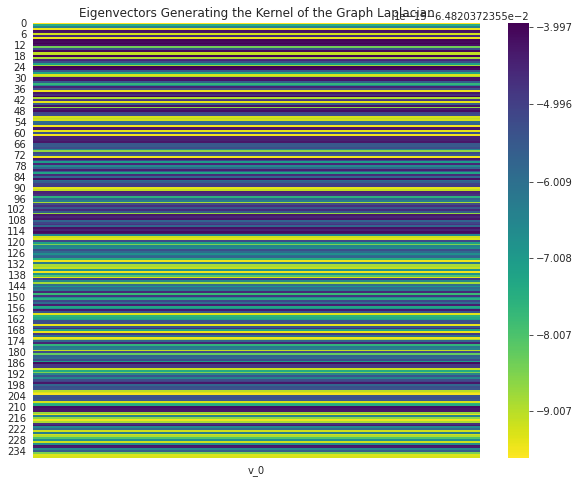

In [34]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(proj_df, ax=ax, cmap='viridis_r')
ax.set(title='Eigenvectors Generating the Kernel of the Graph Laplacian');

Deciding which affinity to use for final clustering

In [35]:
from sklearn.cluster import SpectralClustering

In [49]:
spectral_model_nn = SpectralClustering(n_clusters = 2, affinity ='nearest_neighbors')
labels_nn = spectral_model_nn.fit_predict(data)
spectral_model_rbf = SpectralClustering(n_clusters = 2, affinity ='rbf')
labels_rbf = spectral_model_rbf.fit_predict(data)

In [37]:
from sklearn.metrics import silhouette_score

In [52]:
affinity = ['rbf', 'nearest-neighbours']
  
# List of Silhouette Scores
s_scores = []
  
# Evaluating the performance
s_scores.append(silhouette_score(data, labels_rbf))
s_scores.append(silhouette_score(data, labels_nn))
  
print(s_scores)

[0.5292228554010449, 0.49774304060407765]


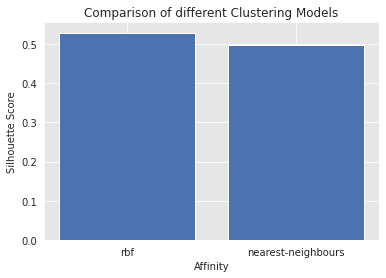

In [39]:
plt.bar(affinity, s_scores)
plt.xlabel('Affinity')
plt.ylabel('Silhouette Score')
plt.title('Comparison of different Clustering Models')
plt.show()

rbf does better than nearest neighbors


In [40]:
from sklearn.metrics import davies_bouldin_score

In [60]:
print(davies_bouldin_score(data,labels_nn))

0.7941375138826706


In [43]:
data1 = data.copy()

In [ ]:
def project_and_transpose(eigenvals, eigenvcts, num_ev):
    """Select the eigenvectors corresponding to the first 
    (sorted) num_ev eigenvalues as columns in a data frame.
    """
    eigenvals_sorted_indices = np.argsort(eigenvals)
    indices = eigenvals_sorted_indices[: num_ev]
    proj_df = pd.DataFrame(eigenvcts[:, indices.squeeze()])
    proj_df.columns = ['v_' + str(c) for c in proj_df.columns]
    return proj_df

###Final Clustering

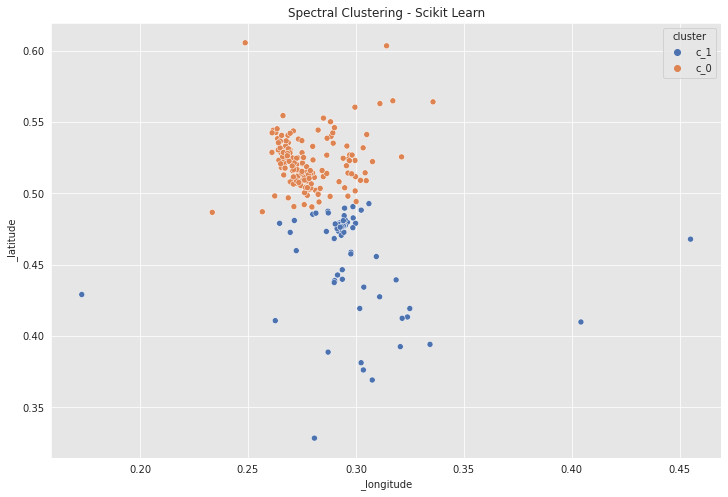

In [61]:
from sklearn.cluster import SpectralClustering
plt.rcParams["figure.figsize"] = (12,8)
spec_cl = SpectralClustering(
    n_clusters=2, 
    random_state=25, 
    n_neighbors=10, 
    affinity='rbf'
)
data['cluster'] = spec_cl.fit_predict(data1)
data['cluster'] = ['c_' + str(c) for c in data['cluster']]


fig, ax = plt.subplots()
sns.scatterplot(x='_longitude',y='_latitude', data=data, hue='cluster', ax=ax)
ax.set(title='Spectral Clustering - Scikit Learn');